In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor

In [2]:
X_train_label = pd.read_csv('data/old_data/X_train_label.csv')
X_test_label = pd.read_csv('data/old_data/X_test_label.csv')

Y_train = pd.read_csv('data/old_data/Y_train.csv')
Y_test = pd.read_csv('data/old_data/Y_test.csv')
arr_delay_only_y_train = pd.read_csv('data/old_data/arr_delay_only_y_train.csv')
arr_delay_only_y_test = pd.read_csv('data/old_data/arr_delay_only_y_test.csv')

Y_train = Y_train[["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_SECURITY", "DELAY_DUE_NAS", "DELAY_DUE_LATE_AIRCRAFT"]]
Y_test = Y_test[["DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER", "DELAY_DUE_SECURITY", "DELAY_DUE_NAS", "DELAY_DUE_LATE_AIRCRAFT"]]

# For overall arrival delay

### Linear Regression model

In [3]:
model = LinearRegression()
model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 16.188156983088934


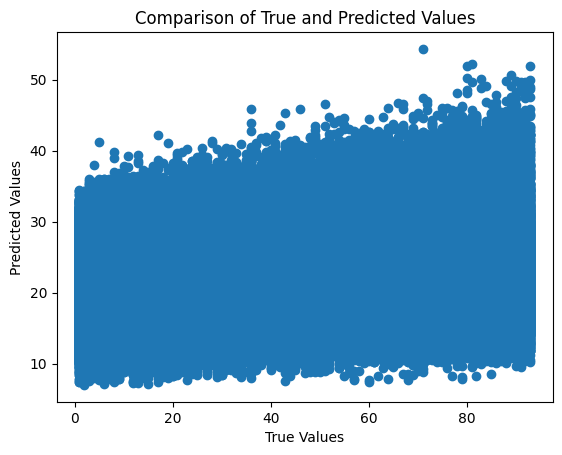

In [4]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [5]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
tree_model.fit(X_train_label, arr_delay_only_y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 15.628490954394495


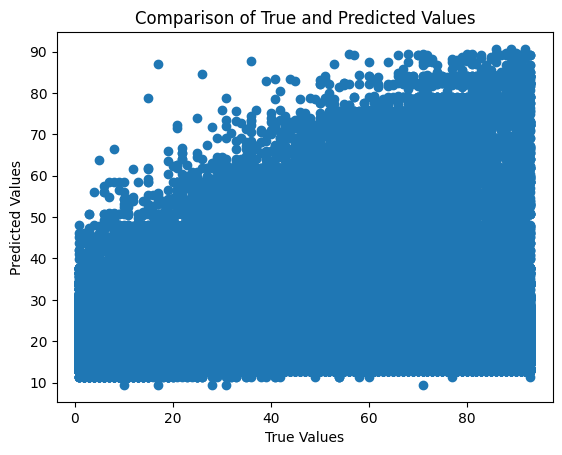

In [6]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()


### Random Forest Regressor

In [7]:
# Train the Random Forest regressor with custom depth and other parameters
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_label, arr_delay_only_y_train.values.ravel())  # ravel() to convert column vector to 1d array

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error
mae = mean_absolute_error(arr_delay_only_y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 15.590807108015435


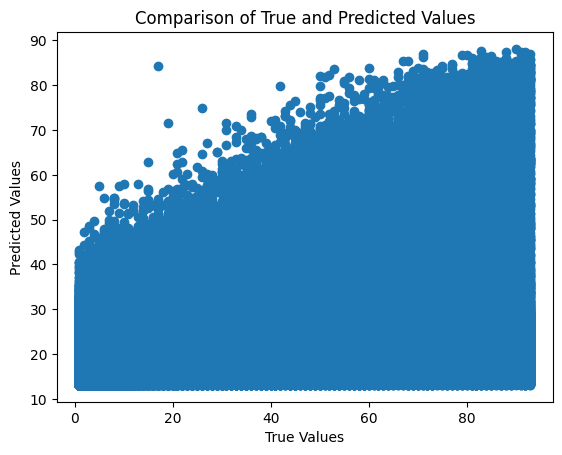

In [8]:
plt.scatter(arr_delay_only_y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

# For individual delay components

In [ ]:
mask = Y_train.notna().all(axis=1)

X_train_label = X_train_label.loc[mask]
Y_train = Y_train.loc[mask]

mask = Y_test.notna().all(axis=1)

X_test_label = X_test_label.loc[mask]
Y_test = Y_test.loc[mask]

### Linear Regression




In [15]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 14.363650738900299
DELAY_DUE_WEATHER: 2.8147629687836075
DELAY_DUE_SECURITY: 0.28497439766141197
DELAY_DUE_NAS: 7.597517086451332
DELAY_DUE_LATE_AIRCRAFT: 14.06207085806094


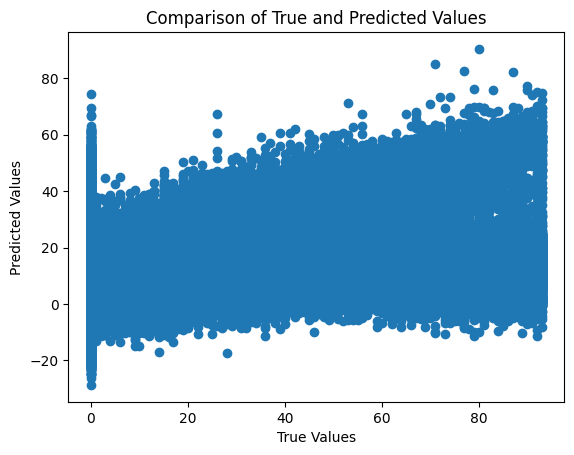

In [16]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Decision Tree Regressor

In [17]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # Example: max_depth=10, min_samples_leaf=5
tree_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = tree_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")

Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 13.546643907125071
DELAY_DUE_WEATHER: 2.780002404606052
DELAY_DUE_SECURITY: 0.28009807089801136
DELAY_DUE_NAS: 7.026183684144435
DELAY_DUE_LATE_AIRCRAFT: 13.407468575372446


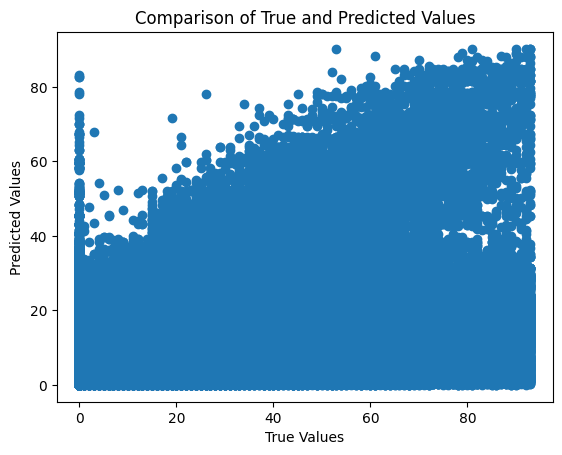

In [18]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Random Forest Regressor

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train_label, Y_train)

# Make predictions on the testing set
Y_pred = rf_model.predict(X_test_label)

# Calculate the mean absolute error for each column
mae = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

print("Mean Absolute Error for each column:")
for col, column_mae in zip(Y_train.columns, mae):
    print(f"{col}: {column_mae}")


Mean Absolute Error for each column:
DELAY_DUE_CARRIER: 13.48963214392718
DELAY_DUE_WEATHER: 2.7796304688094886
DELAY_DUE_SECURITY: 0.2801705045999605
DELAY_DUE_NAS: 6.965875401575673
DELAY_DUE_LATE_AIRCRAFT: 13.367320065644112


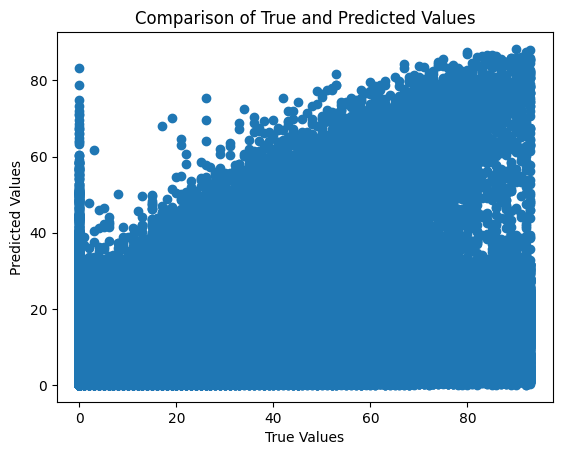

In [20]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of True and Predicted Values")
plt.show()

### Neural Network

In [21]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_label.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5)  # Number of output neurons should match the number of columns in Y
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_label, Y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_label, Y_test)
print("Test Mean Absolute Error:", mae)

# Make predictions
Y_pred = model.predict(X_test_label)

# Calculate Mean Absolute Error for each column
mae_columns = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Absolute Error for each column:")
print(mae_columns)
pd.DataFrame(history.history).to_csv("./models/results/NN_test.csv")

c:\Users\ebror\OneDrive\Documents\GitHub\Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 294.8423 - mae: 9.2217 - val_loss: 188.4559 - val_mae: 7.7736
Epoch 2/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 188.8983 - mae: 7.7869 - val_loss: 188.6774 - val_mae: 7.9154
Epoch 3/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 187.3930 - mae: 7.7328 - val_loss: 187.6641 - val_mae: 7.6156
Epoch 4/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 187.0964 - mae: 7.7160 - val_loss: 188.5629 - val_mae: 7.9026
Epoch 5/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - loss: 185.8210 - mae: 7.6781 - val_loss: 183.7680 - val_mae: 7.5044
Epoch 6/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 184.5307 - mae: 7.6321 - val_loss: 182.8115 - val_mae: 7.5162
Epoch 7/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 184.5925 - mae: 7.6347 - val_loss: 186.9545 - val_mae: 7.7089
Epoch 8/50
43257/43257 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 184.2601 - mae: 7.6245 - val_loss: 184.6454 - 

### XGBoost Regressor

In [22]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_label, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_label)
Y_train_pred = xgb_regressor.predict(X_train_label)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 7.007352352142334
Test Mean Absolute Error: 7.0426740646362305
Train Mean Squared Error: 165.4822998046875
Test Mean Squared Error: 167.1381378173828


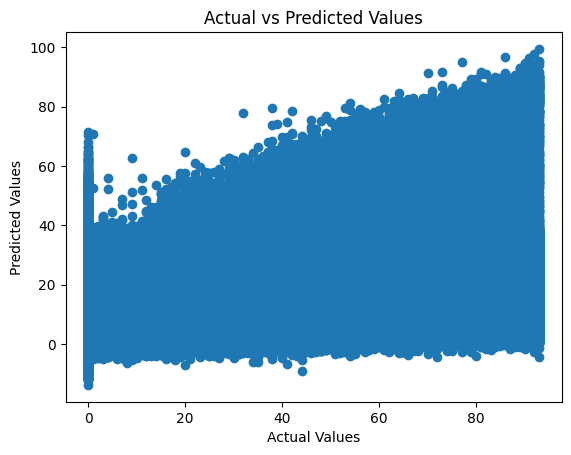

In [23]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

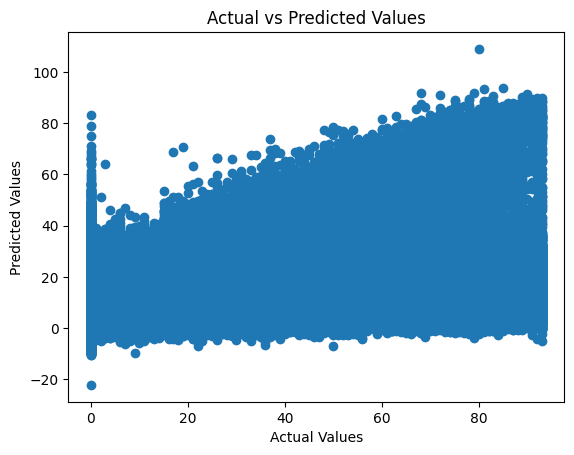

In [24]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()